# Amazon Review Sentiment Analysis and modelling (Compared with Flair's models)

# 1. Install and Import Necessary Libray For NLP and Sentiment Analysis

In [1]:
%%capture
!pip install stopwords
!pip install flair
!pip install nltk
!pip install swifter

In [2]:
import pandas as pd
import numpy as np
import flair
from flair.data import Sentence
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = None

# 2. Import Amazon Product Reviews Dataset and Basic Cleaning

In [3]:
df = pd.read_csv('../input/amazon-product-reviews/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
df.dropna(axis=0,inplace=True)

In [6]:
df.isnull().sum().sum()

0

### We can see the ammount of scoring of each review

In [7]:
df.Score.value_counts()

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64

### Then we classify score values to sentiment. For score values above 3, we classify them into positive sentiment, and for score values below 3 we classify them into negative sentiment

In [8]:
def score_round(x):
    if x>=3:
        return 1
    else: 
        return 0

In [9]:
df['Score_New']=df['Score'].apply(score_round)


In [10]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Score_New
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [11]:
df.Score_New.value_counts()

1    486404
0     82007
Name: Score_New, dtype: int64

In [12]:
review=df.copy()

In [13]:
review.shape

(568411, 11)

# 3. Analysis and Visualization

## 3.1. Wordclouds For all text and Summary Reviews

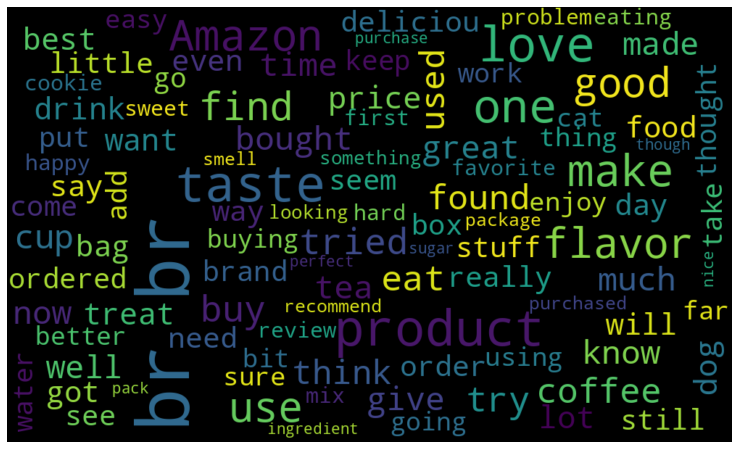

In [14]:
txt = ' '.join(rev for rev in review.Text)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()


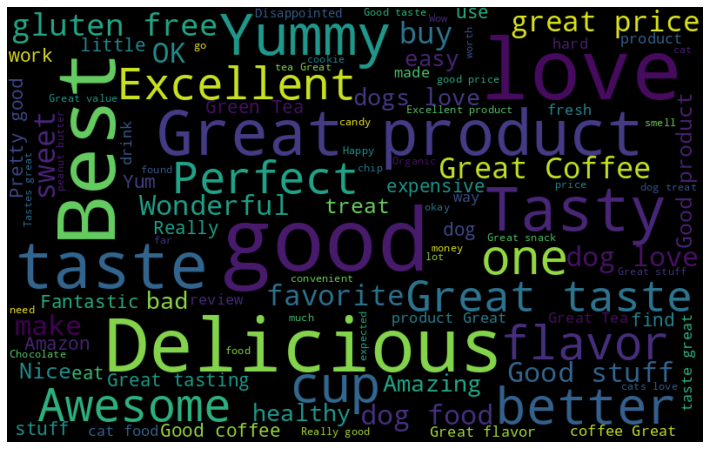

In [15]:
txt = ' '.join(rev for rev in review.Summary)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 3.2. Wordclouds For Each Positive and Negative Sentiment Reviews

## Positive Sentiment

In [16]:
review_positive = review[review['Score_New']==1]

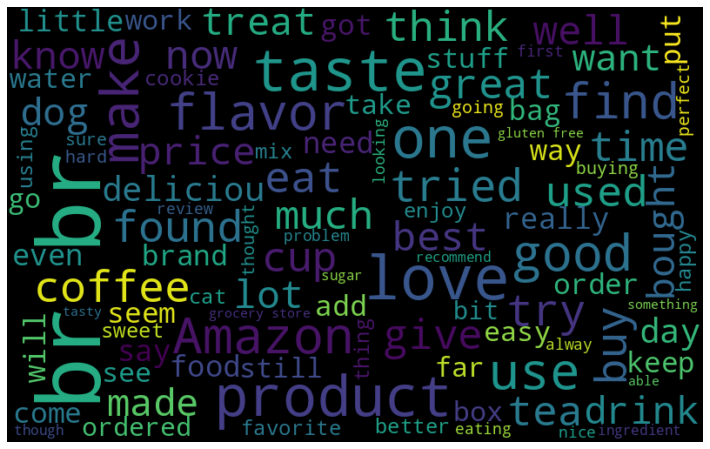

In [17]:
txt = ' '.join(rev for rev in review_positive.Text)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

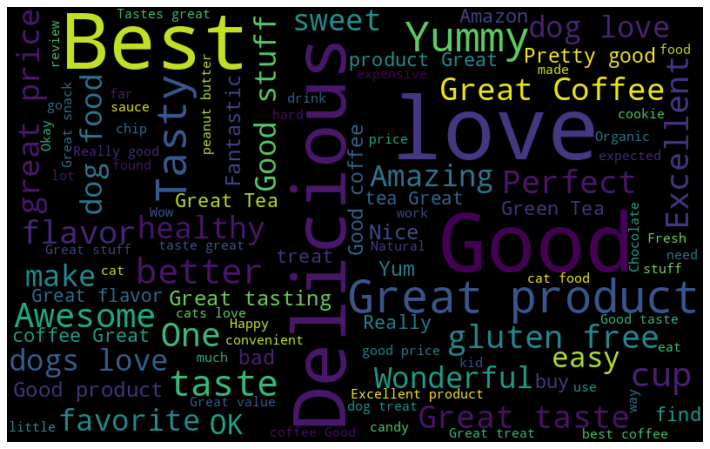

In [18]:
txt = ' '.join(rev for rev in review_positive.Summary)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

### We have better view when we see our review summary's wordcloud. We can see that for postive sentiment review, the most common words are 'Best','Yummy','Awesome','Great', etc as shown in picture above.

## Negative Sentiment

In [19]:
review_negative = review[review['Score_New']==0]

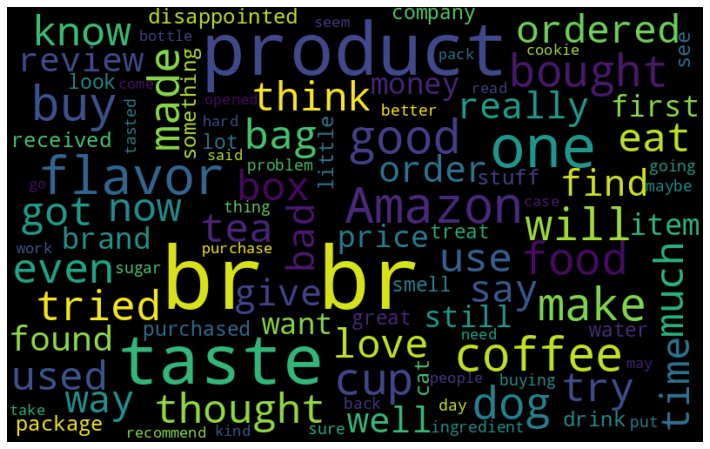

In [20]:
txt = ' '.join(rev for rev in review_negative.Text)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

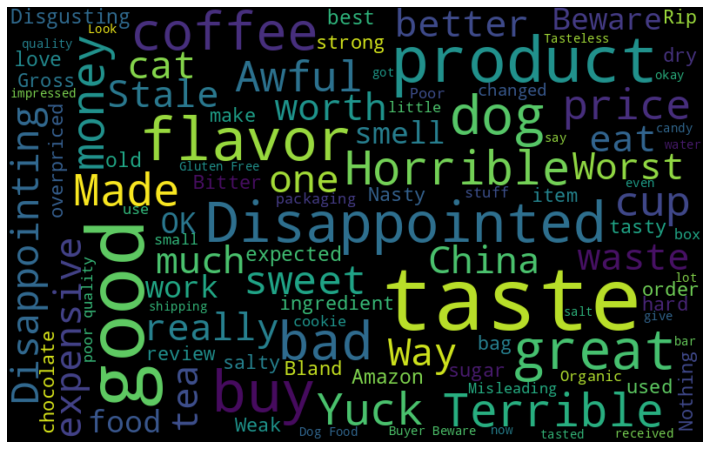

In [21]:
txt = ' '.join(rev for rev in review_negative.Summary)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Same as before, we have better view when we see our review summary's wordcloud. We can see that for negative sentiment review, the most common words are 'Disappointed', 'Horrible', 'Terrible', 'Dissapointing', etc as shown in picture above.

### But we can see that there are words like 'good' and  'great'. They maybe come from sentences like "...not great" or "...not good".

## 3.3. Distribution of Sentiment Reviews

In [22]:
review_vis = review.copy()
review_vis['Score_New'] = review_vis['Score_New'].replace({0 : 'negative'})
review_vis['Score_New'] = review_vis['Score_New'].replace({1 : 'positive'})


<AxesSubplot:xlabel='Score_New', ylabel='count'>

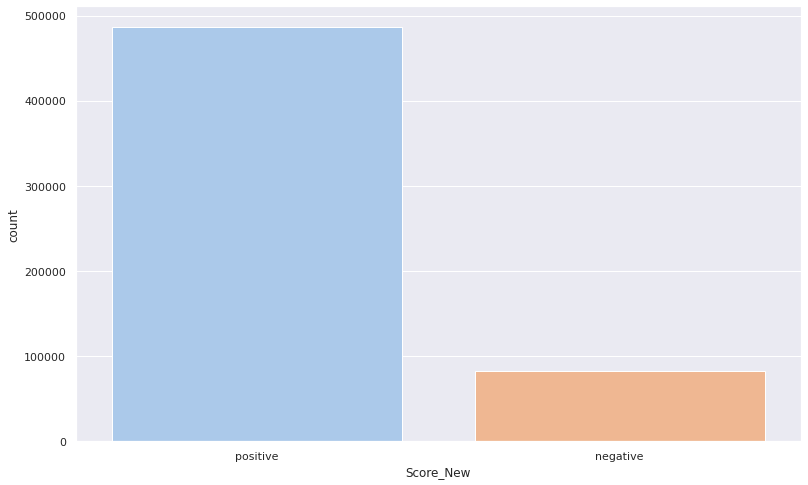

In [61]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
sns.set_palette("pastel")
sns.countplot(x='Score_New',data=review_vis)


# 4. Data Cleaning for Sentiment Processing

In [24]:
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### We make a function to clean some basic characters

In [25]:
def clean(raw):
    """ Remove hyperlinks and markup """
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

### We make a function to clean and remove emoji (if there is some)

In [26]:
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

### We make a function to clean unnecessary whitespaces

In [27]:
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 

### We make a function to clean and remove symbols

In [28]:
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string  

### We make a function to remove punctuation

In [29]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',','))
    return final

### If necessary we can use stemming or lemmatization for advanced cleaning. We will try implementing the function later.

In [30]:
stop_words=stopwords.words('english')
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()

def lemmatization(x):
    rev=[lemma.lemmatize(word) for word in x if (word not in stop_words)]
    rev=' '.join(rev)
    return rev

### Then we combine all cleaning functions

In [31]:
def cleaning(df,review):
    df[review] = df[review].apply(clean)
    df[review] = df[review].apply(deEmojify)
    df[review] = df[review].str.lower() 
    df[review] = df[review].apply(remove_symbols)
    df[review] = df[review].apply(unify_whitespaces)
    df[review] = df[review].apply(remove_punctuation)

In [32]:
cleaning(review,'Text')
cleaning(review,'Summary')

# 5. Bag of Words by Using Vectorizer

In [33]:
review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Score_New
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food,i have bought several of the vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,not as advertised,product arrived labeled as jumbo salted peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,delight says it all,this is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicine,if you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,great taffy,great taffy at a great price there was a wide ...,1


## We split our data to train and test data

In [34]:
# random split train and test 
index = df.index
review['random_number'] = np.random.randn(len(index))
train = review[review['random_number'] <= 0.8]
test = review[review['random_number'] > 0.8]


In [35]:
train.shape

(447756, 12)

In [36]:
test.shape

(120655, 12)

## Then we tokenize our review summary using count vectorizer

In [37]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

In [38]:
X_train = train_matrix
X_test = test_matrix
y_train = train['Score_New']
y_test = test['Score_New']

# 6. Machine Learning Modelling

## 6.1. Logistic Reression Model

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [40]:
lr.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [41]:
# Model Prediction

predictions = lr.predict(X_test)

In [42]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score
new = np.asarray(y_test)
confusion_matrix(y_test,predictions)


array([[  9866,   7432],
       [  3155, 100202]])

In [43]:
def Confusion_Matrix(y_test,ypred):
    cfmat = confusion_matrix(y_test,ypred)
    print('TN - True Negative {}'.format(cfmat[0,0]))
    print('FP - False Positive {}'.format(cfmat[0,1]))
    print('FN - False Negative {}'.format(cfmat[1,0]))
    print('TP - True Positive {}'.format(cfmat[1,1]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('F1-Score: {}'.format(f1_score(y_test, ypred)))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))


In [44]:
Confusion_Matrix(y_test,predictions)

TN - True Negative 9866
FP - False Positive 7432
FN - False Negative 3155
TP - True Positive 100202
Accuracy Rate: 0.9122539472048402
F1-Score: 0.9498225042774336
Misclassification Rate: 0.08774605279515975


### We got our result with model accuracy of 91.21% and F1-Score of 94.97%.

# 7. Compared With Text Classification Model From Flair Package

### We will compare our machine learning model's performance with text classification model from flair package. 

### Flair is a simple to use framework for state of the art NLP.  It provided various functionalities such as pre-trained sentiment analysis models, text embeddings, Named Entity Recognition (NER), etc. This model from Flair splits the text into character-level tokens and uses the DistilBERT model to make predictions. This pre-trained model was trained using IMDB review dataset.

## 7.1. Import Text Classifier Model From Flair

In [45]:
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2022-04-17 03:33:57,004 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


In [48]:
def flair_prediction(x):

    sentence = Sentence(x)
    
    try:        
        sentiment_model.predict(sentence)
        score = sentence.labels[0]
        staging_score = str(score).replace("(",",").replace(")","")
        
        sentiment_score = staging_score.split(",")
        
        if "POSITIVE" in str(sentiment_score[0]):
            return 'POSITIVE', float(sentiment_score[1].strip())
        elif "NEGATIVE" in str(sentiment_score[0]):
            return 'NEGATIVE', float(sentiment_score[1].strip())
        else:
            return "NEUTRAL", 0.00
    except Exception:
        print(sentence)
        pass  # or you could use 'continue'
    
    return "ERROR",0.00


## 7.2. Sentiment Prediction From Our Test Data Using Flair's Model

In [49]:
test['Sentiment'] = ""
test['Sentiment_Score'] = np.nan

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
import warnings
warnings.filterwarnings("ignore")
import swifter
test["Sentiment"],test["Sentiment_Score"] =  zip(*test["Summary"].swifter.apply(flair_prediction))

Pandas Apply:   0%|          | 0/120655 [00:00<?, ?it/s]

Sentence: ""
Sentence: ""
Sentence: ""
2022-04-17 03:41:41,262 Warning: An empty Sentence was created! Are there empty strings in your dataset?
Sentence: ""
Sentence: ""
Sentence: ""
Sentence: ""
2022-04-17 03:48:41,146 Warning: An empty Sentence was created! Are there empty strings in your dataset?
Sentence: ""
2022-04-17 03:49:33,118 Warning: An empty Sentence was created! Are there empty strings in your dataset?
Sentence: ""
Sentence: ""
2022-04-17 03:53:16,971 Warning: An empty Sentence was created! Are there empty strings in your dataset?
Sentence: ""
Sentence: ""
Sentence: ""
2022-04-17 03:55:32,152 Warning: An empty Sentence was created! Are there empty strings in your dataset?
Sentence: ""
Sentence: ""
Sentence: ""
Sentence: ""
Sentence: ""
2022-04-17 04:07:41,289 Warning: An empty Sentence was created! Are there empty strings in your dataset?
Sentence: ""
2022-04-17 04:08:11,502 Warning: An empty Sentence was created! Are there empty strings in your dataset?
Sentence: ""
2022-

In [60]:
test.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Score_New,random_number,Sentiment,Sentiment_Score
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicine,if you are looking for the secret ingredient i...,0,1.016577,0,0.9906
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,i love eating them and they are good for watch...,0,0.822007,0,0.9999
17,18,B001GVISJM,AFKW14U97Z6QO,Becca,0,0,5,1345075200,love it,i am very satisfied with my twizzler purchase ...,1,1.048834,1,0.9965
19,20,B001GVISJM,A3IV7CL2C13K2U,Greg,0,0,5,1318032000,home delivered twizlers,candy was delivered very fast and was purchase...,1,0.949209,1,0.9500
21,22,B001GVISJM,AZOF9E17RGZH8,Tammy Anderson,0,0,5,1308960000,twizzlers,i bought these for my husband who is currently...,1,1.121071,1,0.8919


## 7.3. Some Cleaning and Adjusment

In [52]:
test = test.drop(test[test.Sentiment=='ERROR'].index)

In [53]:
test['Sentiment'] = test['Sentiment'].replace({'NEGATIVE':0})
test['Sentiment'] = test['Sentiment'].replace({'POSITIVE':1})

In [54]:
test['Sentiment']=test['Sentiment'].astype('int')

## 7.4. Model's Performance

In [55]:
y_real = test['Score_New']
y_flair = test['Sentiment']

In [57]:
Confusion_Matrix(y_real,y_flair)

TN - True Negative 14922
FP - False Positive 2365
FN - False Negative 15205
TP - True Positive 88134
Accuracy Rate: 0.8543431764296254
F1-Score: 0.9093572983625502
Misclassification Rate: 0.14565682357037454


### Our flair's text classsifier model has lower accuracy and f1-score than our machine learning model before.